In [2]:
!git clone https://github.com/KaiyangZhou/deep-person-reid.git

fatal: destination path 'deep-person-reid' already exists and is not an empty directory.


In [3]:
%cd deep-person-reid/

/content/deep-person-reid


In [4]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [5]:
%cd deep-person-reid/

[Errno 2] No such file or directory: 'deep-person-reid/'
/content/deep-person-reid


In [6]:
!conda create --name torchreid python=3.9

Solving environment: \ | / - done

## Package Plan ##

  environment location: /usr/local/envs/torchreid

  added / updated specs:
    - python=3.9


The following NEW packages will be INSTALLED:

  _libgcc_mutex      conda-forge/linux-64::_libgcc_mutex-0.1-conda_forge
  _openmp_mutex      conda-forge/linux-64::_openmp_mutex-4.5-2_gnu
  bzip2              conda-forge/linux-64::bzip2-1.0.8-h7f98852_4
  ca-certificates    conda-forge/linux-64::ca-certificates-2022.6.15.2-ha878542_0
  ld_impl_linux-64   conda-forge/linux-64::ld_impl_linux-64-2.36.1-hea4e1c9_2
  libffi             conda-forge/linux-64::libffi-3.4.2-h7f98852_5
  libgcc-ng          conda-forge/linux-64::libgcc-ng-12.1.0-h8d9b700_16
  libgomp            conda-forge/linux-64::libgomp-12.1.0-h8d9b700_16
  libnsl             conda-forge/linux-64::libnsl-2.0.0-h7f98852_0
  libsqlite          conda-forge/linux-64::libsqlite-3.39.3-h753d276_0
  libuuid            conda-forge/linux-64::libuuid-2.32.1-h7f98852_1000
  libzlib 

In [7]:
! conda activate torchreid


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.




In [8]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
!conda install pytorch torchvision cudatoolkit=9.0 -c pytorch

Solving environment: \ failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - cudatoolkit=9.0

Current channels:

  - https://conda.anaconda.org/pytorch/linux-64
  - https://conda.anaconda.org/pytorch/noarch
  - https://conda.anaconda.org/conda-forge/linux-64
  - https://conda.anaconda.org/conda-forge/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [10]:
import torchreid
import torch 
import numpy as np
print(torch.__version__)

/content/deep-person-reid/torchreid/metrics/rank.py:12: UserWarning: Cython evaluation (very fast so highly recommended) is unavailable, now use python evaluation.
  'Cython evaluation (very fast so highly recommended) is '


1.12.1+cu113


## Available PRID models

In [11]:
torchreid.models.show_avai_models()

['resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'resnext50_32x4d', 'resnext101_32x8d', 'resnet50_fc512', 'se_resnet50', 'se_resnet50_fc512', 'se_resnet101', 'se_resnext50_32x4d', 'se_resnext101_32x4d', 'densenet121', 'densenet169', 'densenet201', 'densenet161', 'densenet121_fc512', 'inceptionresnetv2', 'inceptionv4', 'xception', 'resnet50_ibn_a', 'resnet50_ibn_b', 'nasnsetmobile', 'mobilenetv2_x1_0', 'mobilenetv2_x1_4', 'shufflenet', 'squeezenet1_0', 'squeezenet1_0_fc512', 'squeezenet1_1', 'shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'shufflenet_v2_x1_5', 'shufflenet_v2_x2_0', 'mudeep', 'resnet50mid', 'hacnn', 'pcb_p6', 'pcb_p4', 'mlfn', 'osnet_x1_0', 'osnet_x0_75', 'osnet_x0_5', 'osnet_x0_25', 'osnet_ibn_x1_0', 'osnet_ain_x1_0', 'osnet_ain_x0_75', 'osnet_ain_x0_5', 'osnet_ain_x0_25']


**Load data manager**

---



In [12]:
datamanager = torchreid.data.ImageDataManager(
    root="reid-data",
    sources="market1501",
    targets="market1501",
    height=256,
    width=128,
    batch_size_train=16,
    batch_size_test=16,
    transforms=["random_flip"]
)

Building train transforms ...
+ resize to 256x128
+ random flip
+ to torch tensor of range [0, 1]
+ normalization (mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
Building test transforms ...
+ resize to 256x128
+ to torch tensor of range [0, 1]
+ normalization (mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
=> Loading train (source) dataset
=> Loaded Market1501
  ----------------------------------------
  subset   | # ids | # images | # cameras
  ----------------------------------------
  train    |   751 |    12936 |         6
  query    |   750 |     3368 |         6
  gallery  |   751 |    15913 |         6
  ----------------------------------------
=> Loading test (target) dataset


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


=> Loaded Market1501
  ----------------------------------------
  subset   | # ids | # images | # cameras
  ----------------------------------------
  train    |   751 |    12936 |         6
  query    |   750 |     3368 |         6
  gallery  |   751 |    15913 |         6
  ----------------------------------------


  **************** Summary ****************
  source            : ['market1501']
  # source datasets : 1
  # source ids      : 751
  # source images   : 12936
  # source cameras  : 6
  target            : ['market1501']
  *****************************************




**Build model, optimizer and lr_scheduler**

In [13]:
model = torchreid.models.build_model(
    name="densenet201",
    num_classes=datamanager.num_train_pids,
    loss="softmax",
    pretrained=True
)

# model = model.cuda()

optimizer = torchreid.optim.build_optimizer(
    model,
    optim="adam",
    lr=0.0003
)

scheduler = torchreid.optim.build_lr_scheduler(
    optimizer,
    lr_scheduler="single_step",
    stepsize=20
)

In [14]:
engine = torchreid.engine.ImageSoftmaxEngine(
    datamanager,
    model,
    optimizer=optimizer,
    scheduler=scheduler,
    label_smooth=True
)

In [17]:
def search_for_single_query(top_k, img_path, q_pid, q_camid, is_id_known, datasetname, model, engine, use_gpu):
    height=256
    width=128
    transforms = ['random_flip']
    norm_mean=[0.485, 0.456, 0.406]
    norm_std=[0.229, 0.224, 0.225]

    # convert the int to np array
    q_pid = np.array([q_pid])

    # creating a transformation function for single image, takes path and returns PIL img
    _, single_transform = torchreid.data.transforms.build_transforms(height,width,transforms=transforms, norm_mean=norm_mean, norm_std=norm_std)

    # read image
    PIL_img = torchreid.utils.tools.read_image(img_path)
    # change the PIL image to tensor
    tensor_img = single_transform(PIL_img)
    tensor_img = tensor_img[None, :] # expanding the dimension to be a bigger tensor containing one tensored image

    # extract the featues from the model, the features shape is same as number of person IDs
    img_features = model(tensor_img)

    # preparing the gallery dataset loader for testing against the single query image input
    gal_loader = datamanager.test_loader[datasetname]['gallery']

    # an internaL function to extract features for every gallery image
    def dataloader_feature_extraction(engine, data_loader, model, use_gpu):
        f_, pids_, camids_ = [], [], []
        max_bid = 2 # FOR MEMORY ISSUES
        for batch_idx, data in enumerate(data_loader):
            print(f'now bid: {batch_idx}, max: {max_bid}')
            if batch_idx >= max_bid:
                break
            imgs, pids, camids = engine.parse_data_for_eval(data)
            if use_gpu:
                imgs = imgs.cuda()
            features = model(imgs)
            features = features.cpu()
            f_.append(features)
            pids_.extend(pids.tolist())
            camids_.extend(camids.tolist())
        f_ = torch.cat(f_, 0)
        pids_ = np.asarray(pids_)
        camids_ = np.asarray(camids_)
        return f_, pids_, camids_
    
    # extracting features for gallery images
    gf, g_pids, g_camids = dataloader_feature_extraction(engine, gal_loader, model, use_gpu)

    # calculating distance from query image to each gallery image
    distmat = torchreid.metrics.distance.compute_distance_matrix(img_features, gf)

    # just editing the matrix for later usage, drop the grads because it causes an error
    detdistmat = distmat.detach().numpy()
    np_distmat = torch.tensor(detdistmat)

    # sort (just find the indecies order not actual sort) the gallery images according to the distance (ascending)
    indices = np.argsort(np_distmat, axis=1)
    matches = (g_pids[indices] == q_pid[:, np.newaxis]).astype(np.int32)


    # check the presence of query match candidate in the top-k nearest gallery images
    selected_k = matches[0][0:top_k]
    k_indices = indices[0][0:top_k]
    found = np.where(selected_k == 1)[0]

    if is_id_known:
        # print the candidate ids, if found matched.
        found_ids = []
        if len(found) > 0:
            print("matches found in selected k gallery images")
            found_idx = k_indices[found].tolist()
            found_ids = g_pids[found_idx].tolist()
            print(f'the matched or candidate person IDs are: {found_ids}')
        else:
            print("matches NOT found in selected k gallery images")

        return found_ids
    else:
        print("top-k nearest person IDs are these:")
        top_k_ids = g_pids[k_indices].tolist()
        print(top_k_ids)

In [18]:
search_for_single_query(32, '/content/deep-person-reid/reid-data/market1501/Market-1501-v15.09.15/query/0304_c2s1_067871_00.jpg',\
                        0, 0, False, "market1501", model, engine, False)

Building train transforms ...
+ resize to 256x128
+ random flip
+ to torch tensor of range [0, 1]
+ normalization (mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
Building test transforms ...
+ resize to 256x128
+ to torch tensor of range [0, 1]
+ normalization (mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


now bid: 0, max: 2
now bid: 1, max: 2
now bid: 2, max: 2
top-k nearest person IDs are these:
[1184, 745, 1499, 1444, 252, 0, 737, 720, 1141, 0, 580, 550, 550, 950, 817, 1184, 0, 293, 569, 1498, 569, 978, 267, 609, 36, 0, 396, 505, 226, 527, 103, 171]


In [19]:
#######################################################################################
################################### BELOW IS SOME DEBUGGING ###########################
#######################################################################################

In [12]:
height=256
width=128
transforms = ['random_flip']
norm_mean=[0.485, 0.456, 0.406]
norm_std=[0.229, 0.224, 0.225]

_, single_transform = torchreid.data.transforms.build_transforms(height,width,transforms=transforms, norm_mean=norm_mean, norm_std=norm_std)

Building train transforms ...
+ resize to 256x128
+ random flip
+ to torch tensor of range [0, 1]
+ normalization (mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
Building test transforms ...
+ resize to 256x128
+ to torch tensor of range [0, 1]
+ normalization (mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])


In [13]:
PIL_img = torchreid.utils.tools.read_image('/content/deep-person-reid/reid-data/market1501/Market-1501-v15.09.15/query/0304_c2s1_067871_00.jpg')

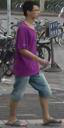

In [14]:
PIL_img

In [15]:
tensor_img = single_transform(PIL_img)

In [16]:
tensor_img = tensor_img[None, :]

In [17]:
tensor_img.shape

torch.Size([1, 3, 256, 128])

In [18]:
# tensor_img = tensor_img.cuda()

In [19]:
img_features = model(tensor_img)

In [20]:
type(img_features)

torch.Tensor

In [21]:
img_features.shape

torch.Size([1, 751])

In [22]:
gal_loader = datamanager.test_loader["market1501"]['gallery']

In [23]:
import numpy as np


def dataloader_feature_extraction(engine, data_loader, model, use_gpu):
    f_, pids_, camids_ = [], [], []
    max_bid = 3
    for batch_idx, data in enumerate(data_loader):
        print(f'now bid: {batch_idx}, max: {max_bid}')
        if batch_idx >= max_bid:
            break
        imgs, pids, camids = engine.parse_data_for_eval(data)
        if use_gpu:
            imgs = imgs.cuda()
        features = model(imgs)
        features = features.cpu()
        f_.append(features)
        pids_.extend(pids.tolist())
        camids_.extend(camids.tolist())
    f_ = torch.cat(f_, 0)
    pids_ = np.asarray(pids_)
    camids_ = np.asarray(camids_)
    return f_, pids_, camids_

# there is a questionable normalization step

In [24]:
# torch.cuda.empty_cache()

In [25]:
#torch.cuda.memory_summary(device=None, abbreviated=False)

In [26]:
gf, g_pids, g_camids = dataloader_feature_extraction(engine, gal_loader, model, False)

now bid: 0, max: 3
now bid: 1, max: 3
now bid: 2, max: 3
now bid: 3, max: 3


In [27]:
type(gf)

torch.Tensor

In [28]:
gf.shape

torch.Size([48, 751])

In [32]:
distmat = torchreid.metrics.distance.compute_distance_matrix(img_features, gf)

In [33]:
distmat.shape

torch.Size([1, 48])

In [54]:
distmat

tensor([[21.1045, 19.5115, 26.5478, 21.6670, 24.6128, 31.3303, 24.3926, 21.4773,
         28.8888, 18.4387, 22.8267, 29.4657, 32.4163, 22.2144, 18.4303, 29.3837,
         21.1962, 26.4860, 21.1527, 19.5605, 19.7261, 25.6000, 20.6318, 28.2696,
         20.9669, 27.1557, 26.9683, 27.6494, 24.7997, 31.7345, 20.6209, 21.0177,
         19.7789, 28.7913, 21.8215, 26.3490, 26.2069, 26.7844, 23.0609, 26.8814,
         18.6370, 20.4212, 31.4009, 23.4486, 21.1724, 24.2578, 27.4271, 22.1891]],
       grad_fn=<AddmmBackward0>)

In [57]:
detdistmat = distmat.detach().numpy()
detdistmat

array([[21.104523, 19.511467, 26.54781 , 21.666992, 24.612808, 31.330322,
        24.392609, 21.47733 , 28.888802, 18.438663, 22.82669 , 29.46566 ,
        32.416298, 22.214355, 18.43032 , 29.383698, 21.196198, 26.485958,
        21.15271 , 19.560482, 19.726147, 25.59999 , 20.631802, 28.269558,
        20.966877, 27.155666, 26.968323, 27.649433, 24.799747, 31.73449 ,
        20.620926, 21.017666, 19.778862, 28.791252, 21.821548, 26.349018,
        26.206947, 26.784424, 23.06086 , 26.881432, 18.636963, 20.421165,
        31.400864, 23.4486  , 21.172417, 24.257812, 27.42707 , 22.189133]],
      dtype=float32)

In [59]:
np_distmat = torch.tensor(detdistmat)
np_distmat

tensor([[21.1045, 19.5115, 26.5478, 21.6670, 24.6128, 31.3303, 24.3926, 21.4773,
         28.8888, 18.4387, 22.8267, 29.4657, 32.4163, 22.2144, 18.4303, 29.3837,
         21.1962, 26.4860, 21.1527, 19.5605, 19.7261, 25.6000, 20.6318, 28.2696,
         20.9669, 27.1557, 26.9683, 27.6494, 24.7997, 31.7345, 20.6209, 21.0177,
         19.7789, 28.7913, 21.8215, 26.3490, 26.2069, 26.7844, 23.0609, 26.8814,
         18.6370, 20.4212, 31.4009, 23.4486, 21.1724, 24.2578, 27.4271, 22.1891]])

In [60]:
np_distmat.shape

torch.Size([1, 48])

In [62]:
indices = np.argsort(np_distmat, axis=1)
indices

tensor([[14,  9, 40,  1, 19, 20, 32, 41, 30, 22, 24, 31,  0, 18, 44, 16,  7,  3,
         34, 47, 13, 10, 38, 43, 45,  6,  4, 28, 21, 36, 35, 17,  2, 37, 39, 26,
         25, 46, 27, 23, 33,  8, 15, 11,  5, 42, 29, 12]])

In [67]:
fqid = np.array([171])

In [68]:
 matches = (g_pids[indices] == fqid[:, np.newaxis]).astype(np.int32)

In [79]:
matches.shape

(1, 48)

In [82]:
type(matches)

numpy.ndarray

In [83]:
matches[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1], dtype=int32)

In [107]:
top_k = 48
selected_k = matches[0][0:top_k]

k_indices = indices[0][0:top_k]

found = np.where(selected_k == 1)[0]

if len(found) > 0:
    print("matches found in selected k gallery images")
    found_idx = k_indices[found].tolist()
    found_ids = g_pids[found_idx].tolist()
    print(f'the matched or candidate person IDs are: {found_ids}')
else:
    print("matches NOT found in selected k gallery images")

tensor([14,  9, 40,  1, 19, 20, 32, 41, 30, 22, 24, 31,  0, 18, 44, 16,  7,  3,
        34, 47, 13, 10, 38, 43, 45,  6,  4, 28, 21, 36, 35, 17,  2, 37, 39, 26,
        25, 46, 27, 23, 33,  8, 15, 11,  5, 42, 29, 12])

matches found in selected k gallery images
the matched or candidate person IDs are: [0, 745, 171]


In [125]:
found_ids = g_pids[foun_idx].tolist()

In [113]:
g_pids[k_indices]

array([1499,    0, 1247, 1184,  745,    0, 1040,  884, 1444,  737,  950,
        580, 1184,  293, 1270, 1141,  720,  817,  799,  627,  550,  252,
        453,  686, 1070, 1498,  267,  978,  609,   41,    0,   36,  550,
        720,    0,  569,  569,  163,  396,    0,  776,    0,  103,  505,
        527,    0,  226,  171])

In [35]:
type(g_pids)

numpy.ndarray

In [64]:
qid = np.array([304])
cid = np.array([2])

In [37]:
type(qid)

numpy.ndarray

In [38]:
g_pids

array([1184, 1184,  550,  817,  267,  527, 1498,  720,    0,    0,  252,
        505,  171,  550, 1499,  103, 1141,   36,  293,  745,    0,  609,
        737,    0,  950,  569,  569,  396,  978,  226, 1444,  580, 1040,
        776,  799,    0,   41,  720,  453,    0, 1247,  884,    0,  686,
       1270, 1070,  163,  627])

In [40]:
g_camids

array([2, 0, 2, 4, 5, 1, 4, 5, 0, 5, 5, 2, 1, 4, 5, 2, 4, 4, 1, 4, 2, 5,
       5, 3, 4, 3, 1, 2, 0, 4, 4, 5, 2, 5, 2, 2, 4, 0, 1, 1, 1, 0, 5, 3,
       1, 2, 5, 0])

In [70]:
cmc, mAP = torchreid.metrics.rank.evaluate_rank(np_distmat, fqid, g_pids, cid, g_camids)

Note: number of gallery samples is quite small, got 48


In [71]:
cmc

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
      dtype=float32)

In [75]:
mAP

0.020833333333333332

In [74]:
##############################

In [38]:
engine.run(
    save_dir="log/densenet201",
    max_epoch=60,
    eval_freq=10,
    print_freq=10,
    visrank=True,
    visrank_topk=3,
    test_only=True
)

##### Evaluating market1501 (source) #####
Extracting features from query set ...
Done, obtained 1-by-1920 matrix
Extracting features from gallery set ...
Done, obtained 15913-by-1920 matrix
Speed: 0.1561 sec/batch
Computing distance matrix with metric=euclidean ...
Computing CMC and mAP ...
** Results **
mAP: 0.5%
CMC curve
Rank-1  : 0.0%
Rank-5  : 0.0%
Rank-10 : 0.0%
Rank-20 : 0.0%
# query: 1
# gallery 15913
Visualizing top-3 ranks ...
Done. Images have been saved to "log/densenet201/visrank_market1501" ...


In [ ]:
###############

In [ ]:
QL = datamanager.test_loader
QL

In [16]:
ql,gl = datamanager.fetch_test_loaders("market1501")

In [17]:
gl

[('/content/deep-person-reid/reid-data/market1501/Market-1501-v15.09.15/bounding_box_test/1349_c5s3_041140_03.jpg',
  1349,
  4,
  0),
 ('/content/deep-person-reid/reid-data/market1501/Market-1501-v15.09.15/bounding_box_test/0916_c4s4_053441_01.jpg',
  916,
  3,
  0),
 ('/content/deep-person-reid/reid-data/market1501/Market-1501-v15.09.15/bounding_box_test/0039_c4s1_003826_03.jpg',
  39,
  3,
  0),
 ('/content/deep-person-reid/reid-data/market1501/Market-1501-v15.09.15/bounding_box_test/0103_c5s1_017401_01.jpg',
  103,
  4,
  0),
 ('/content/deep-person-reid/reid-data/market1501/Market-1501-v15.09.15/bounding_box_test/1194_c6s3_036217_01.jpg',
  1194,
  5,
  0),
 ('/content/deep-person-reid/reid-data/market1501/Market-1501-v15.09.15/bounding_box_test/0000_c6s1_021976_04.jpg',
  0,
  5,
  0),
 ('/content/deep-person-reid/reid-data/market1501/Market-1501-v15.09.15/bounding_box_test/0000_c1s5_009911_02.jpg',
  0,
  0,
  0),
 ('/content/deep-person-reid/reid-data/market1501/Market-1501-v15

In [14]:
type(gl)

list

In [19]:
ql

[('/content/deep-person-reid/reid-data/market1501/Market-1501-v15.09.15/query/0304_c2s1_067871_00.jpg',
  304,
  1,
  0),
 ('/content/deep-person-reid/reid-data/market1501/Market-1501-v15.09.15/query/0794_c2s2_086182_00.jpg',
  794,
  1,
  0),
 ('/content/deep-person-reid/reid-data/market1501/Market-1501-v15.09.15/query/1065_c6s3_004842_00.jpg',
  1065,
  5,
  0),
 ('/content/deep-person-reid/reid-data/market1501/Market-1501-v15.09.15/query/0841_c2s2_104557_00.jpg',
  841,
  1,
  0),
 ('/content/deep-person-reid/reid-data/market1501/Market-1501-v15.09.15/query/0935_c3s2_117094_00.jpg',
  935,
  2,
  0),
 ('/content/deep-person-reid/reid-data/market1501/Market-1501-v15.09.15/query/0626_c4s3_038979_00.jpg',
  626,
  3,
  0),
 ('/content/deep-person-reid/reid-data/market1501/Market-1501-v15.09.15/query/1438_c5s3_056365_00.jpg',
  1438,
  4,
  0),
 ('/content/deep-person-reid/reid-data/market1501/Market-1501-v15.09.15/query/1446_c2s3_048707_00.jpg',
  1446,
  1,
  0),
 ('/content/deep-pers

In [25]:
single_query_set = [('/content/deep-person-reid/reid-data/market1501/Market-1501-v15.09.15/query/0304_c3s1_067967_00.jpg',
  304,
  2,
  0)]

In [26]:
single_query_loader = torch.utils.data.DataLoader(single_query_set, batch_size=1)


In [32]:
for batch_idx, data in enumerate(single_query_loader):
  imgs, pids, camids, _ = data

In [33]:
engine._evaluate(dataset_name="market1501",
        query_loader=single_query_loader,
        gallery_loader=gl,
        dist_metric='euclidean',
        normalize_feature=False,
        visrank=False,
        visrank_topk=10,
        save_dir='',
        use_metric_cuhk03=False,
        ranks=[1, 5, 10, 20],
        rerank=False)

Extracting features from query set ...


TypeError: ignored